In [1]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten,BatchNormalization
from keras.optimizers import SGD
import tensorflow as tf
from keras.layers import Dropout
from keras.regularizers import l2

In [2]:
import livelossplot
from livelossplot import PlotLossesKeras

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [5]:
def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

In [6]:
def define_model1():

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(256, (3, 3),activation='relu', kernel_initializer ='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
# better baseline

def define_model2():

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(256, (3, 3),activation='relu', kernel_initializer ='he_uniform', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(256, (3, 3),activation='relu', kernel_initializer ='he_uniform', padding='same',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform',padding='same',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

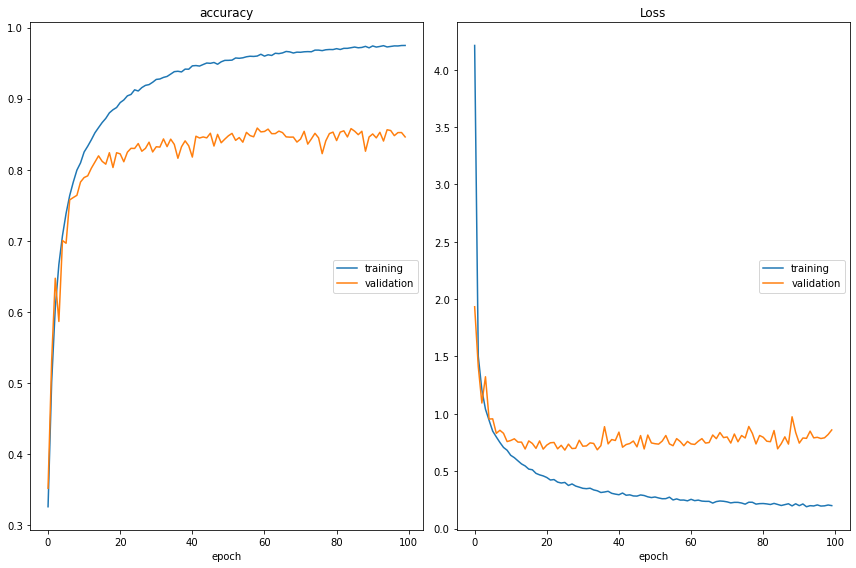

accuracy
	training         	 (min:    0.326, max:    0.975, cur:    0.975)
	validation       	 (min:    0.352, max:    0.859, cur:    0.846)
Loss
	training         	 (min:    0.190, max:    4.211, cur:    0.200)
	validation       	 (min:    0.684, max:    1.934, cur:    0.860)
> 84.610


In [21]:

trainX, trainY, testX, testY = load_dataset()
trainX, testX = prep_pixels(trainX, testX)
model = define_model2()
model.fit(trainX, trainY, epochs=100, batch_size=128, validation_data=(testX, testY),callbacks=[PlotLossesKeras()], verbose=0)
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

model.save('final.h5')

In [10]:
from keras.applications import VGG16
from tensorflow.keras.models import Model

In [11]:
def mod3():
    base_mod= VGG16(include_top=False,weights='imagenet',input_shape=(32,32,3),pooling='avg')
    x=base_mod.output
    x=Flatten()(x)
    x=Dense(1024,activation='relu')(x)
    x=Dense(256,activation='relu')(x)
    
    outer=Dense(10,activation='softmax')(x)
    model = Model(inputs=base_mod.input, outputs=outer)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model